In [ ]:
#hide
#!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
#hide
from fastbook import *
from fastai.vision.widgets import *
from fastai.vision import *
from fastai.vision.all import *
import requests


In [ ]:
customconfigid =  "efb1b149-c219-4091-be6d-14a279c405c4"
subscriptionkey = "1be3ada0f2a649d087e9fb39798485a0"

def search_images_bing_new(key, term, customConfigId, min_sz=20):
    url = 'https://api.bing.microsoft.com/v7.0/custom/images/search?' + 'q=' + term + '&' + 'customconfig=' + customConfigId + '&' + 'count=150'
    r = requests.get(url, headers={'Ocp-Apim-Subscription-Key': key})
    search_results = r.json()
    return L([img["thumbnailUrl"] + ".jpg" for img in search_results["value"][:20]])


results = search_images_bing_new(subscriptionkey, 'C. G. Kratzenstein Stub malerier',customconfigid)
len(results)



20

In [ ]:
def create_folder_structure(rootpath, subfolders):
  if not rootpath.exists():
      rootpath.mkdir()
      for o in subfolders:
          dest = (rootpath/o)
          print("new destination" + str(dest))
          dest.mkdir(exist_ok=True)
          
def get_images_for_types(rootfolder,types):
   for o in food_types:
      subfolder_path = str(rootfolder)+"/"+str(o)

      if Path(subfolder_path).exists():
          results = search_images_bing_new(subscriptionkey, f'{o} + malerier', customconfigid)
          download_images(Path(subfolder_path), urls=results)

#path = Path('foods')
path = Path('painters')
#food_types = ['hotdog','pizza','burger']
food_types = ['C. G. Kratzenstein Stub','nicolai abildgaard','Christen Købke','Wilhelm Marstrand','Constantin Hansen','Martinus Rørbye','J. Th. Lundbye','C. A. Jensen','D. C. Blunck','Wilhelm Bendz','P. C. Skovgaard','Jørgen Roed','Jørgen Sonne','Frederik Sødring']

create_folder_structure(path,food_types)
get_images_for_types(path,food_types)

new destinationpainters/C. G. Kratzenstein Stub
new destinationpainters/nicolai abildgaard
new destinationpainters/Christen Købke
new destinationpainters/Wilhelm Marstrand
new destinationpainters/Constantin Hansen
new destinationpainters/Martinus Rørbye
new destinationpainters/J. Th. Lundbye
new destinationpainters/C. A. Jensen
new destinationpainters/D. C. Blunck
new destinationpainters/Wilhelm Bendz
new destinationpainters/P. C. Skovgaard
new destinationpainters/Jørgen Roed
new destinationpainters/Jørgen Sonne
new destinationpainters/Frederik Sødring


In [ ]:
fns = get_image_files(path)
fns

(#279) [Path('painters/Martinus Rørbye/00000015.jpg'),Path('painters/Martinus Rørbye/00000002.jpg'),Path('painters/Martinus Rørbye/00000019.jpg'),Path('painters/Martinus Rørbye/00000006.jpg'),Path('painters/Martinus Rørbye/00000012.jpg'),Path('painters/Martinus Rørbye/00000016.jpg'),Path('painters/Martinus Rørbye/00000003.jpg'),Path('painters/Martinus Rørbye/00000017.jpg'),Path('painters/Martinus Rørbye/00000005.jpg'),Path('painters/Martinus Rørbye/00000014.jpg')...]

In [ ]:
failed = verify_images(fns)
failed

(#0) []

In [ ]:

failed.map(path.unlink);

In [ ]:
foodsDataBlock = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
dls = foodsDataBlock.dataloaders(path)

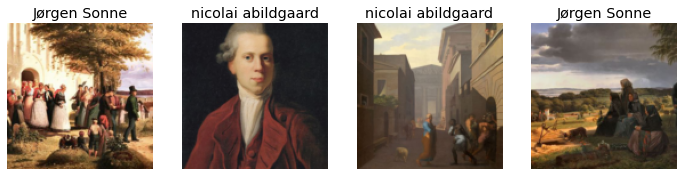

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
food2 = foodsDataBlock.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = foodsDataBlock.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:

food3 = foodsDataBlock.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = foodsDataBlock.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

In [ ]:
food4 = foodsDataBlock.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = foodsDataBlock.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [ ]:
painters = foodsDataBlock.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = foodsDataBlock.dataloaders(path)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(8)

epoch,train_loss,valid_loss,error_rate,time
0,4.194372,3.286378,0.854545,00:17


epoch,train_loss,valid_loss,error_rate,time
0,3.259392,2.715583,0.836364,00:22
1,3.008168,2.332369,0.745455,00:22
2,2.686463,2.131774,0.654545,00:22
3,2.347925,2.034401,0.581818,00:22
4,2.055835,1.978149,0.563636,00:23
5,1.817638,1.962508,0.527273,00:22
6,1.645273,1.960300,0.509091,00:22
7,1.500497,1.947082,0.527273,00:23


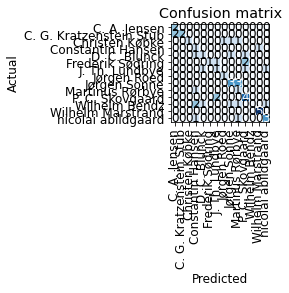

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

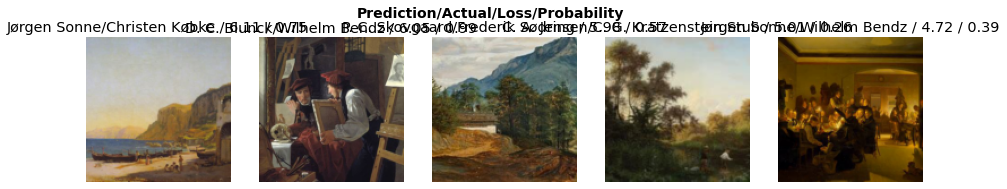

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
learn_inf.predict('test/mystery_image.PNG')

('Wilhelm Marstrand',
 tensor(12),
 tensor([0.0089, 0.0036, 0.0016, 0.0186, 0.0931, 0.0065, 0.0058, 0.0082, 0.2703, 0.0072, 0.0171, 0.0009, 0.5057, 0.0525]))